In [31]:
# importing required libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [32]:
train_data= pd.read_csv('processed_train.csv',index_col=0)

<AxesSubplot:ylabel='Frequency'>

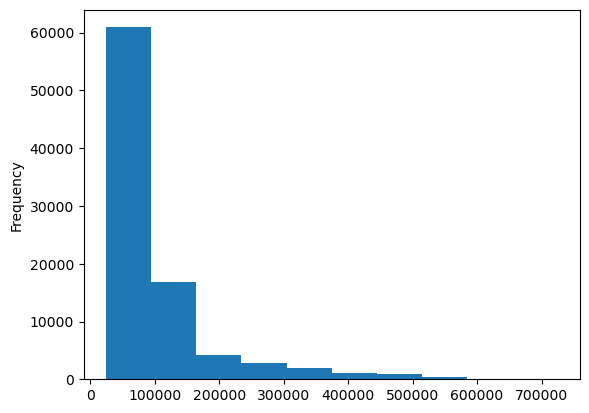

In [33]:
train_data.cltv.plot.hist()

In [34]:
y= train_data.pop('cltv')
X = train_data.copy()

In [35]:

# Create a function to bin the data

def equal_frequency_binning(data, n_bins):
    
    # Determine the bin edges by using qcut() function
    binned_data,bins = pd.qcut(data, n_bins,labels=False, retbins=True)
    return binned_data,bins


n_bins = 4
binned_y,ranges = equal_frequency_binning(y, n_bins)



In [36]:
category_range = pd.DataFrame({'category':np.unique(binned_y), 'range': ['24828-52851','52851-66408',\
                                                       '66408-103452','103452-724068']}).set_index('category')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, binned_y, test_size=0.3, random_state=42)

In [38]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [39]:
model.score(X_test,y_test)

0.47053338306602016

In [40]:
data= pd.DataFrame({'predict': model.predict(X_test),'actual':y_test})

In [41]:
prediction= model.predict_proba(X_test)

In [42]:
print(category_range)

                  range
category               
0           24828-52851
1           52851-66408
2          66408-103452
3         103452-724068


Here Red color shows actual class of data

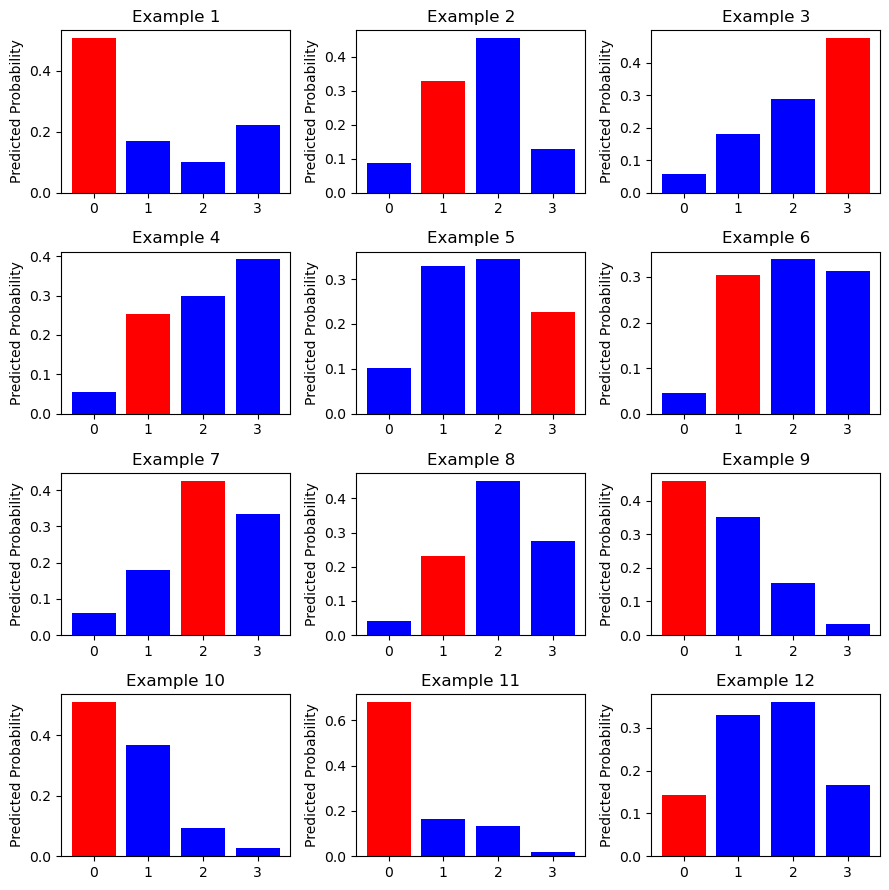

In [43]:
import matplotlib.pyplot as plt

# Create a 3x3 figure
fig, axs = plt.subplots(4, 3, figsize=(9, 9))

# Flatten the axes array so that we can easily access the subplots
axs = axs.ravel()

# Set the class labels
class_labels = [0, 1, 2, 3]

color_codes = ['blue', 'blue', 'blue', 'blue']

# Iterate over the subplots
for i, ax in enumerate(axs):
    # Get the data for the current subplot
    data = prediction[i+6]
    # Plot the bar graph
    color_codes = ['blue', 'blue', 'blue', 'blue']
    color_codes[y_test.values[i+6]]='red'
    
    ax.bar(class_labels, data, color=color_codes)
    # Set the title of the subplot
    ax.set_ylabel('Predicted Probability')
    ax.set_title('Example ' + str(i+1))

# Tighten the layout
plt.tight_layout()
# Show the plot
plt.show()